In [1]:
import pandas as pd
import pickle

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import  Ridge, Lasso
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

import seaborn as sns

In [2]:
with open('data/pickles/full_feature_log_inflected.pickle', 'rb') as to_read:
    df = pickle.load(to_read)

In [3]:
X = df.drop('log_grad_rate', axis = 1)
y = df.log_grad_rate

## Lasso

In [4]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [5]:
k_splits = kf.split(X,y)

In [6]:
#best alpha taken from iterative method
lasso = Lasso(alpha = .009)

In [7]:
train_r2 = []
val_r2 = []
for train, val in k_splits:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X.iloc[train])
    y_train = y.iloc[train]
    lasso.fit(X_train, y_train)
    train_r2.append(lasso.score(X_train, y_train))
    
    X_val = scaler.transform(X.iloc[val])
    y_val = y.iloc[val]
    val_r2.append(lasso.score(X_val, y_val))
    

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with inpu

In [8]:
print(sum(train_r2)/len(train_r2))
print(sum(val_r2)/len(val_r2))

0.6485429414399766
0.5117785033196245


In [9]:
for feature, coef in zip(list(X), lasso.coef_):
    print(feature, coef)

Student_Count_Total -0.06854131159382504
Zip_Mean_Income -0.0
Fully Accessible -0.000923148480526953
Generally accessible 0.0
Student_Count_Asian_perc 0.0
Student_Count_Asian_Pacific_Islander_perc -0.08719708381382663
Student_Count_Black_perc 0.07089903375325464
Student_Count_English_Learners_perc 0.11191885079961585
Student_Count_Ethnicity_Not_Available_perc 0.050168674798737566
Student_Count_Hawaiian_Pacific_Islander_perc -0.019698395255543698
Student_Count_Hispanic_perc -0.2155447762746349
Student_Count_Low_Income_perc 0.0989251447265497
Student_Count_Multi_perc -0.21477039841360557
Student_Count_Native_American_perc 0.11939071645313
Student_Count_Other_Ethnicity_perc 0.0
Student_Count_Special_Ed_perc 0.25513965077597367
Student_Count_White_perc -0.0
Classroom_Languages_count -0.013164640516607106
Blue 0.03526704949045995
Brown -0.0
Green -0.07826264411360434
Orange 0.0
Pink 0.0
Purple 0.02596094478549125
Red -0.0036483053839929036
Dress_Code_dummie -0.04815576348112302
grades_offer

## Linear Model

In [10]:
X = X.drop(columns = ['Zip_Mean_Income', 'Generally accessible', 'Student_Count_Asian_perc', 
           'Student_Count_Asian_perc', 'Student_Count_Other_Ethnicity_perc','Student_Count_White_perc',
          'Brown', 'Orange', 'Pink', 'gender_f_bn', 'Student_Count_Native_American_perc'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [12]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)

r2_train = []
r2_val =   []
for train, val in kf.split(X_train,y_train):
    lm = LinearRegression()
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_val, y_val     = X.iloc[val], y.iloc[val]
    
    lm.fit(X_train, y_train)
    r2_train.append(lm.score(X_train, y_train))
    r2_val.append(lm.score(X_val, y_val))

In [13]:
print(sum(r2_train)/len(r2_train))
print(r2_train)
print(sum(r2_val)/len(r2_val))
print(r2_val)

0.6085013570022632
[0.6078556718796924, 0.6022397057797548, 0.6326492767813001, 0.664788809035739, 0.5349733215348298]
0.43607816854479725
[0.52307971813827, 0.5085403845112488, 0.32323863930484875, 0.09411874993484526, 0.7314133508347733]


In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.6486218425655055

In [15]:
for feature, coef in zip(list(X),lm.coef_):
    print(feature, coef)

Student_Count_Total -9.466880446256421e-05
Fully Accessible -0.014916289642909369
Student_Count_Asian_Pacific_Islander_perc -82.61721610847255
Student_Count_Black_perc -0.9748929940351451
Student_Count_English_Learners_perc 0.8762429930578999
Student_Count_Ethnicity_Not_Available_perc -3.197151627628279
Student_Count_Hawaiian_Pacific_Islander_perc -32.57961717809839
Student_Count_Hispanic_perc -1.6772238842789164
Student_Count_Low_Income_perc 0.633784682196469
Student_Count_Multi_perc -24.1131727356034
Student_Count_Special_Ed_perc 2.1291523773437038
Classroom_Languages_count -0.050756239773918924
Blue 0.13548424977743276
Green -0.14003560972609586
Purple 0.1900647948879515
Red 0.011786211064173773
Dress_Code_dummie -0.1522155473184538
grades_offered_count 0.08166553514872954
charter -0.1886859954034156


## Residual Plot

In [16]:
train_pred = lm.predict(X_train)
res        = train_pred - y_train

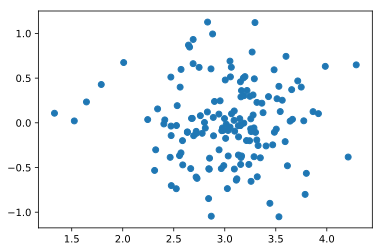

In [17]:
plt.scatter(train_pred, res)

In [18]:
predict = lm.predict(X_test)
residuals = y_test - predict

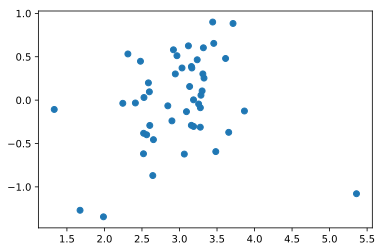

In [19]:
plt.scatter(predict, residuals)

In [20]:
# To reverse the log of graduation rate, take the log
for feature, coef in zip(list(X),lm.coef_):
    print(feature, np.e**coef)


Student_Count_Total 0.9999053356764873
Fully Accessible 0.9851944071269458
Student_Count_Asian_Pacific_Islander_perc 1.3176465640581192e-36
Student_Count_Black_perc 0.37723271755444127
Student_Count_English_Learners_perc 2.401858933241568
Student_Count_Ethnicity_Not_Available_perc 0.04087847542756906
Student_Count_Hawaiian_Pacific_Islander_perc 7.093360578928395e-15
Student_Count_Hispanic_perc 0.18689209060453743
Student_Count_Low_Income_perc 1.8847302028535604
Student_Count_Multi_perc 3.371181536875854e-11
Student_Count_Special_Ed_perc 8.407737201717266
Classroom_Languages_count 0.950510338910617
Blue 1.1450911602517702
Green 0.8693272783413536
Purple 1.209327953387935
Red 1.0118559421355546
Dress_Code_dummie 0.8588031480737683
grades_offered_count 1.0850928237199853
charter 0.8280464762765121


In [ ]:
#+1 X1 =e^(B1) (100- y)